# Пример

Adam = ADAptive Moment Estimation

Adam - адаптивная оценка момента. Используются две переменные скользящего среднего:

$v$ – первый момент
$s$ – второй момент
Алгоритм вычисляет экспоненциально взвешенное среднее прошлых градиентов и их квадратов градиентов. Эти скользящие средние затем используются для обновления параметров модели.

Алгоритм Адама состоит из следующих шагов:

Инициализация переменных. Алгоритм начинается с инициализации переменных скользящего среднего $v$ и $s$ - словарей для хранения экспоненциально взвешенных средних градиентов и квадратов градиентов соответственно.

Вычисление скользящих средних. Для каждого параметра модели алгоритм вычисляет скользящее среднее градиентов путем объединения текущего градиента с предыдущим скользящим средним. Также вычисляется скользящее среднее квадратов градиентов.
Коррекция смещения. Чтобы уменьшить смещение во время начальных итераций, Adam выполняет коррекцию смещения путем деления скользящих средних на поправочный коэффициент.
Обновление параметров. Алгоритм обновляет параметры модели, используя скользящие средние градиентов и квадраты градиентов.

\begin{aligned} s_t &= \beta_1 s_{t-1} + \left(1 – \beta_1 \right ) \nabla w_t \\v_t &= \beta_2 v_{t-1} + \left(1 – \beta_2 \right ) \left(\nabla w_t \right )^2 \\\hat{s_t} &= \frac{s_t}{1 – {\beta_1}^t}\\ \hat{v_t} &= \frac{v_t}{1 – {\beta_2}^t}\\ w_{t + 1} &= w_t – \frac{\alpha\hat{s_t}}{\sqrt{\hat{v_t} + \epsilon}}  \end{aligned}

$w_t$ - веса модели;

learning_rate ($\alpha$) - скорость обучения;

$\beta_1, \beta_2$ - скорости затухания для первого и второго моментов соответственно;

$s$ - оценка первого момента (среднее) градиентов;

$v$ - оценка второго момента (нецентрированная дисперсия) градиентов;

$t$ - текущая итерация;

$\epsilon$ - маленькое число, чтобы избежать деления на 0.

Минимум найден:
f([-9.86141076e-05  1.93822431e-09]) = 0.000000


C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_12840\1664080860.py:83: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


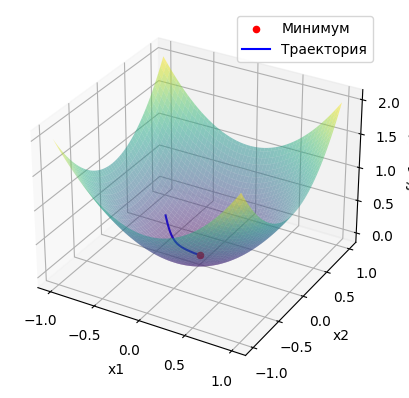

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# целевая функция
def objective(x1, x2):
    return x1**2 + x2**2

# градиент целевой функции
def gradient(x1, x2):
    return np.array([2*x1, 2*x2])

# инициализация моментов
def init_adam():
    s = np.zeros(2)
    v = np.zeros(2)
    return s, v

# шаг Adam - пересчет параметров
def adam_update_weights(x, grad, s, v, iteration, learning_rate, beta1, beta2, epsylon = 1e-8):
    s = beta1*s + (1 - beta1)*grad
    v = beta2*v + (1 - beta2)*(grad**2)
    s_hat = s / (1 - beta1**(iteration + 1))
    v_hat = v / (1 - beta2**(iteration + 1))
    x -= learning_rate * s_hat / (np.sqrt(v_hat) + epsylon)
    return x, s, v

# алгоритм Adam
def adam(objective, grad, bounds, max_iter, learning_rate, beta1, beta2, epsylon = 1e-8):
    # начальная точка
    x = bounds[:, 0] + np.random.rand(len(bounds))*(bounds[:, 1] - bounds[:, 0])
    score = objective(x[0], x[1])
    scores, trajectory = [], []
    # инициализация моментов
    s, v = init_adam()

    # градиентный спуск Adam
    for _ in range(max_iter):
        # вычисление градиента
        grad = gradient(x[0], x[1])

        # пересчет параметров
        x, s, v = adam_update_weights(x, grad, s, v, _, learning_rate, beta1, beta2, epsylon)

        # вычисление целевой функции
        score = objective(x[0], x[1])
        scores.append(score)
        trajectory.append(x.copy())

        # print(">%d f(%s) = %.15f" % (_, x, score))
    return x, scores, trajectory

np.random.seed(12345678)

# определение границ
bounds = np.array([[-1.0, 1.0], [-1.0, 1.0]])

max_iter = 160
learning_rate = 0.01
beta1 = 0.8
beta2 = 0.999

# Градиентный спуск Adam
x_min, scores, trajectory = adam(objective, gradient, bounds, max_iter, learning_rate, beta1, beta2)
print("Минимум найден:")
print("f(%s) = %f" % (x_min, scores[-1]))

# визуализация
x = np.linspace(bounds[0, 0], bounds[0, 1], 100)
y = np.linspace(bounds[1, 0], bounds[1, 1], 100)
X, Y = np.meshgrid(x, y)
Z = objective(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot_surface(X, Y, Z, cmap = 'viridis', alpha = 0.5)
ax.scatter(x_min[0], x_min[1], objective(x_min[0], x_min[1]), color = 'red', label = "Минимум")
ax.plot([point[0] for point in trajectory], [point[1] for point in trajectory], scores, color = "blue", label = "Траектория")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
ax.legend()
fig.show()


>0 f([ 0.34326042 -0.37804338]) = 0.26074
>1 f([ 0.27453625 -0.30924881]) = 0.17100
>2 f([ 0.19421614 -0.228584  ]) = 0.08997
>3 f([ 0.10889035 -0.14221215]) = 0.03208
>4 f([ 0.02585085 -0.05672143]) = 0.00389
>5 f([-0.04689446  0.02070929]) = 0.00263
>6 f([-0.10197447  0.08315473]) = 0.01731
>7 f([-0.13484511  0.12558593]) = 0.03396
>8 f([-0.1450838   0.14626277]) = 0.04244
>9 f([-0.13578162  0.14679985]) = 0.03999
>10 f([-0.11197782  0.13109868]) = 0.02973
>11 f([-0.07934515  0.10410414]) = 0.01713
>12 f([-0.04341111  0.0709296 ]) = 0.00692
>13 f([-0.00908183  0.03633538]) = 0.00140
>14 f([0.01974401 0.00438002]) = 0.00041
>15 f([ 0.04049811 -0.02185926]) = 0.00212
>16 f([ 0.05210055 -0.04048462]) = 0.00435
>17 f([ 0.05486753 -0.05082857]) = 0.00559
>18 f([ 0.05019851 -0.05332585]) = 0.00536
>19 f([ 0.04015966 -0.049245  ]) = 0.00404
>20 f([ 0.02707544 -0.04036108]) = 0.00236
>21 f([ 0.01318754 -0.02864135]) = 0.00099
>22 f([ 0.00039831 -0.01598289]) = 0.00026
>23 f([-0.00989794 -0.0

C:\Users\vsoloviev\AppData\Local\Temp\ipykernel_8380\271599125.py:35: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


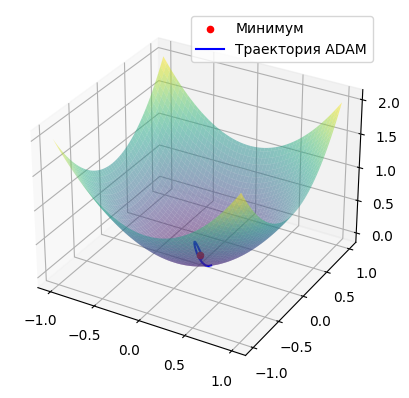

# Задание

Задание


Модифицировать класс градиентного спуска для линейной регрессии с использованием алгоритма Adam.
Сравнить скорость обучения и качество модели для набора данных videogames.

# Классы регрессий

## lr

In [ ]:
class LinearRegressionGD:
    def __init__(self, lr=0.01, max_iter=1000, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr
        # максимальное число итераций
        self.max_iteration = max_iter
        # критерий сходимости
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None

    def fit(self, X, y, x_test, y_test):
        self.X = X.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        # размерность вектора X
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        error_test = []
        step = 0
        for _ in range(self.max_iteration):
            grad = self.gradient(self.X, y)
            self.theta -= self.learning_rate * grad
            error_test.append(self.MSE(x_test, y_test))
            new_error = ((y - self.predict(X)).T @ (y - self.predict(X))) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors, error_test

    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)

    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta

    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)

    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()

    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

## slr

In [ ]:
class LinearRegressionSGD:
    def __init__(self, lr=0.01, max_iter=1000, batch_size=32, tol=1e-3, intercept = True):
        # скорость обучения градиентного спуска
        self.learning_rate = lr
        # максимальное число итераций
        self.max_iteration = max_iter
        # размер мини-батча
        self.batch_size = batch_size
        # критерий сходимости
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.theta = None
        self.n = None
        self.d = None

    def fit(self, X, y, x_test, y_test):
        self.X = X.copy()
        self.y = y.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        # размерность вектора X
        self.n, self.d = self.X.shape
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        error_test = []
        step = 0
        for _ in range(self.max_iteration):
            # перемешивание данных
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            # цикл по мини-батчам
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                grad = self.gradient(X_batch, y_batch)
                self.theta -= self.learning_rate * grad
            error_test.append(self.MSE(x_test, y_test))
            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors, error_test

    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)
    def accuracy(self, x, Y):
        return ((self.predict(x) > 0.5) == Y).mean()

    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta

    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)

    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()

    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

## adam

In [ ]:
class LinearRegressionADAM:
    def __init__(self, learning_rate=0.001,  max_iter=1000, batch_size=32, tol=1e-3, beta1=0.8, beta2=0.999, intercept = True,  epsylon=1e-8,):
        # скорость обучения градиентного спуска
        self.learning_rate = learning_rate
        # максимальное число итераций
        self.max_iteration = max_iter
        # размер мини-батча
        self.batch_size = batch_size
        # критерий сходимости
        self.tolerance_convergence  = tol
        # наличие свободного члена
        self.intercept = intercept
        # инициальзация весов: None
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsylon = epsylon
        self.s = None
        self.v = None
        self.theta = None
        self.n = None
        self.d = None
    def fit(self, X, y, x_test, y_test):
        self.X = X.copy()
        self.y = y.copy()
        if self.intercept:
            self.X = np.hstack((np.ones((self.X.shape[0], 1)), self.X))
        # размерность вектора X
        self.n, self.d = self.X.shape
        self.s= np.zeros(self.d)
        self.v= np.zeros(self.d)
        # инициализация случайных весов
        self.theta = np.random.randn(self.d)
        steps, errors = [], []
        error_test = []
        step = 0
        for _ in range(self.max_iteration):
            # перемешивание данных
            indices = np.random.permutation(self.n)
            X = self.X[indices]
            y = self.y[indices]
            # цикл по мини-батчам
            for i in range(0, self.n, self.batch_size):
                X_batch = X[i:i+self.batch_size]
                y_batch = y[i:i+self.batch_size]
                grad = self.gradient(X_batch, y_batch)
                self.s = beta1* self.s + (1 - beta1)*grad
                self.v = beta2* self.v + (1 - beta2)*(grad**2)
                self.theta -= self.learning_rate * self.s / np.sqrt(self.v + self.epsylon)
            error_test.append(self.MSE(x_test, y_test))
            new_error = ((self.y - self.X @ self.theta).T @ (self.y - self.X @ self.theta)) / self.n
            step += 1
            steps.append(step)
            errors.append(new_error)
            # проверка сходимости
            if np.linalg.norm(grad) < self.tolerance_convergence:
                break
        return steps, errors, error_test
        # градиент целевой функции
    def gradient(self, X, y):
        return X.T @ (X @ self.theta - y) / len(y)
    # целевая функция
    def objective(self, X, y, weights):
        # Целевая функция - среднеквадратичная ошибка
        predictions = X.dot(weights)
        error = predictions - y
        return np.mean(error**2)
    def predict(self, X):
        if self.intercept:
            X_ = np.hstack((np.ones((X.shape[0],1)), X))
        else:
            X_ = X
        return X_ @ self.theta
    def MSE(self, X, y):
        return ((y - self.predict(X)).T @ (y - self.predict(X))) / len(y)
    def MAE(self, X, y):
        return abs(y - self.predict(X)).mean()
    def MAPE(self, X, y):
        return abs((y - self.predict(X))/y).mean()

# Функции

In [ ]:
def feature_scaling(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std, mean, std

In [ ]:
def train_test_split_(x, y, test_size=0.2, random_state=None):
    data = np.concatenate((x, y.reshape(y.shape[0],1)), axis=1)
    # Задаем seed для воспроизводимости результатов, если указан random_state
    if random_state is not None:
        np.random.seed(random_state)

    # Вычисляем количество элементов для тестовой выборки
    num_test = int(len(data) * test_size)

    # Случайно перемешиваем индексы
    shuffled_indices = np.random.permutation(len(data))

    # Выбираем индексы для тестовой выборки
    test_indices = shuffled_indices[:num_test]

    # Выбираем индексы для обучающей выборки
    train_indices = shuffled_indices[num_test:]

    # Разделяем данные на обучающую и тестовую выборки
    train_data = data[train_indices]
    test_data = data[test_indices]

    return train_data[:,:-1], train_data[:,-1], test_data[:,:-1], test_data[:,-1]

# Основная часть

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np


df = pd.read_csv('Video Games.csv')
data = df.copy()
le = LabelEncoder()
data['platform'] = le.fit_transform(data['platform'])
data['genre'] = le.fit_transform(data['genre'])
data['publisher'] = le.fit_transform(data['publisher'])
data.drop('id', axis=1)
data.fillna(data.median())
Y = np.array(data['jp_sales'])
x = np.array(data.drop('jp_sales', axis=1))


x = (x - x.mean()) / x.std()
x_train, y_train, x_test, y_test = train_test_split_(x, Y, 0.8, 20038)

## GD

In [ ]:
import time
modelGD = LinearRegressionGD(lr=0.1, max_iter=5000, tol=1e-3, intercept = True)
start_time = time.time()
steps, errors_gd, error_test_gd = modelGD.fit(x_train, y_train, x_test, y_test)
print("Время обучения LinearRegressionGD:", time.time() - start_time)
print("MSE_train: ", modelGD.MSE(x_train, y_train))
print("MSE_test: ", modelGD.MSE(x_test, y_test))
print("MAE_train: ", modelGD.MAE(x_train, y_train))
print("MAE_test: ", modelGD.MAE(x_test, y_test))
print("MAPE_train: ", modelGD.MAPE(x_train, y_train))
print("MAPE_test: ", modelGD.MAPE(x_test, y_test))

Время обучения LinearRegressionGD: 17.90579843521118
MSE_train:  0.26708995444572753
MSE_test:  0.24261371265608378
MAE_train:  0.21969529526916193
MAE_test:  0.22665484683926115
MAPE_train:  0.15088602176612675
MAPE_test:  0.1534630017947678


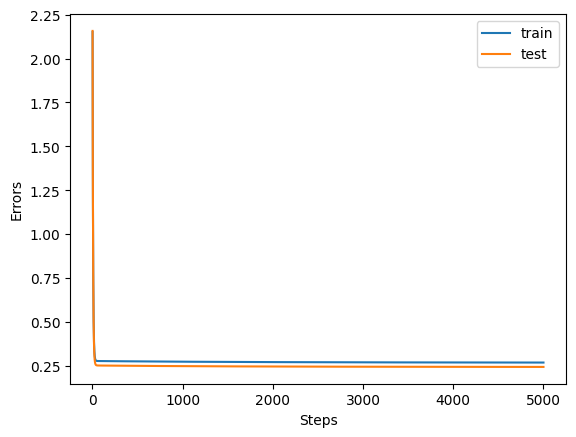

In [ ]:
import matplotlib.pyplot as plt
plt.plot(steps, errors_gd, label='train')
plt.plot(steps, error_test_gd, label='test')
plt.xlabel("Steps")
plt.ylabel("Errors")
plt.legend()
plt.show()

## SGD

### Подбор Batch

In [ ]:
from tqdm import tqdm
errors_array_train, errors_array_test, batch_size_arr = [], [], []
batch_time = []
for batch_size in tqdm(range(1, len(x_train), 20)):
   modelSGD = LinearRegressionSGD(lr=0.1, max_iter=5000, batch_size=batch_size, tol=1e-3, intercept = True)
   start_time = time.time()
   steps, errors_sgd, error_test_sgd = modelSGD.fit(x_train, y_train, x_test, y_test)
   batch_time.append(time.time() - start_time)
   errors_array_train.append(modelSGD.MSE(x_train, y_train))
   errors_array_test.append(modelSGD.MSE(x_test, y_test))
   batch_size_arr.append(batch_size)

100%|██████████| 43/43 [02:22<00:00,  3.32s/it]


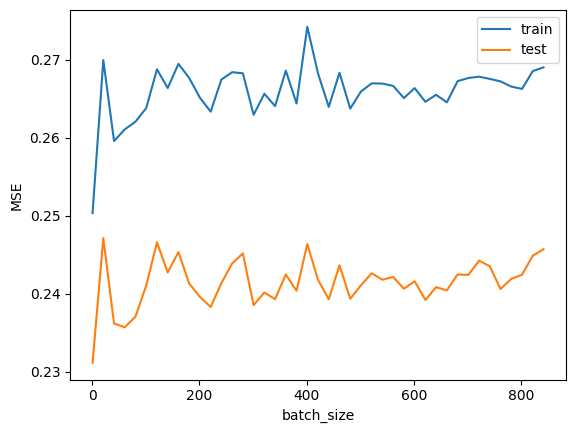

In [ ]:
plt.plot(batch_size_arr, errors_array_train, label='train')
plt.plot(batch_size_arr, errors_array_test, label='test')
plt.xlabel("batch_size")
plt.ylabel("MSE")
plt.legend()
plt.show()

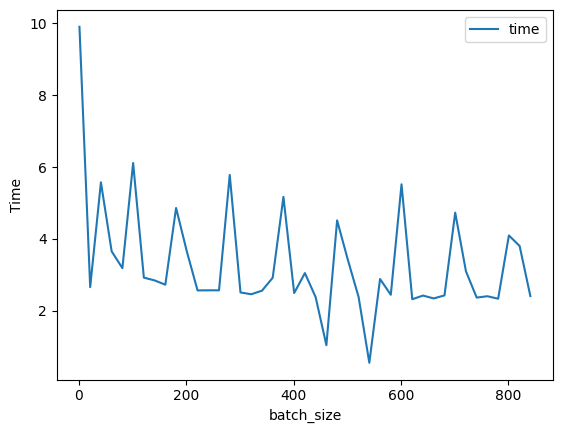

In [ ]:
plt.plot(batch_size_arr, batch_time, label='time')
plt.xlabel("batch_size")
plt.ylabel("Time")
plt.legend()
plt.show()

### Результат

In [ ]:
start_time = time.time()
modelSGD1 = LinearRegressionSGD(lr=0.1, max_iter=5000, batch_size=80, tol=1e-3, intercept = True)
steps, errors_sgd, error_test_sgd = modelSGD1.fit(x_train, y_train, x_test, y_test)
print("Время обучения LinearRegressionSGD:", time.time() - start_time)
print("MSE_train: ", modelSGD1.MSE(x_train, y_train))
print("MSE_test: ", modelSGD1.MSE(x_test, y_test))
print("MAE_train: ", modelSGD1.MAE(x_train, y_train))
print("MAE_test: ", modelSGD1.MAE(x_test, y_test))
print("MAPE_train: ", modelSGD1.MAPE(x_train, y_train))
print("MAPE_test: ", modelSGD1.MAPE(x_test, y_test))

Время обучения LinearRegressionSGD: 13.821609735488892
MSE_train:  0.20978337833851474
MSE_test:  0.18990888756654697
MAE_train:  0.17407384181617166
MAE_test:  0.17902497966276765
MAPE_train:  0.11988857826885378
MAPE_test:  0.12147075850367789


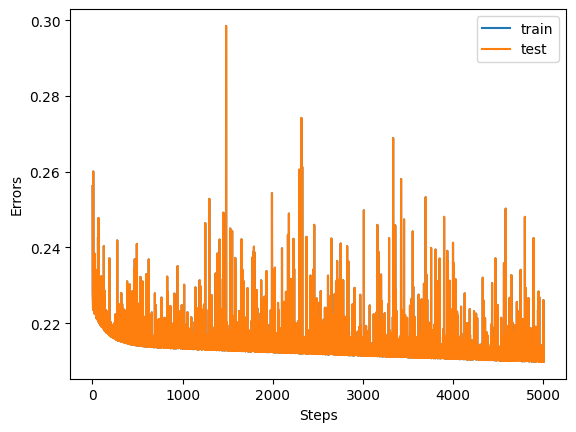

In [ ]:
import matplotlib.pyplot as plt
plt.plot(steps, errors_sgd, label='train')
plt.plot(steps, errors_sgd, label='test')
plt.xlabel("Steps")
plt.ylabel("Errors")
plt.legend()
plt.show()

## ADAM

### Подбор Batch

In [ ]:
from tqdm import tqdm
errors_array_train, errors_array_test, batch_size_arr = [], [], []
batch_time = []
learning_rate=0.1
max_iter=5000
tol=1e-3
beta1=0.9
beta2=0.999
epsylon=1e-9
for batch_size in tqdm(range(1, len(x_train), 20)):
   modelADAM = LinearRegressionADAM(learning_rate=learning_rate, max_iter=max_iter, batch_size=batch_size, tol=tol, intercept = True, beta1=beta1, beta2=beta2, epsylon=epsylon)
   start_time = time.time()
   steps, errors, error_step = modelADAM.fit(x_train, y_train, x_test, y_test)
   batch_time.append(time.time() - start_time)
   errors_array_train.append(modelADAM.MSE(x_train, y_train))
   errors_array_test.append(modelADAM.MSE(x_test, y_test))
   batch_size_arr.append(batch_size)

100%|██████████| 43/43 [03:21<00:00,  4.69s/it]


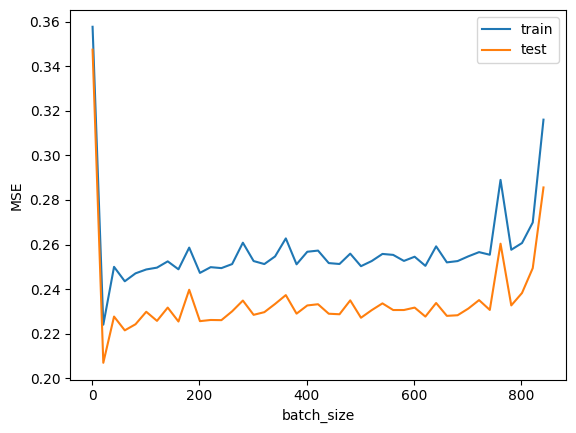

In [ ]:
import matplotlib.pyplot as plt
plt.plot(batch_size_arr, errors_array_train, label='train')
plt.plot(batch_size_arr, errors_array_test, label='test')
plt.xlabel("batch_size")
plt.ylabel("MSE")
plt.legend()
plt.show()

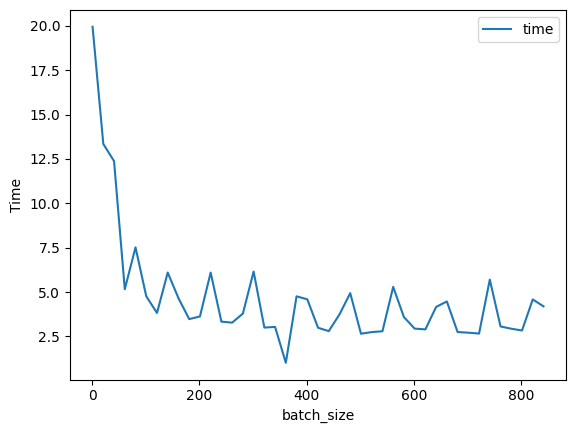

In [ ]:
plt.plot(batch_size_arr, batch_time, label='time')
plt.xlabel("batch_size")
plt.ylabel("Time")
plt.legend()
plt.show()

### Результат

In [ ]:
learning_rate=0.1
max_iter=5000
batch_size=360
tol=1e-3
beta1=0.9
beta2=0.999
epsylon=1e-9
start_time = time.time()
modelADAM = LinearRegressionADAM(learning_rate=learning_rate,  max_iter=max_iter, batch_size=batch_size, tol=tol, beta1=beta1, beta2=beta2, epsylon=epsylon, intercept = True)
steps, errors_adam, error_test_adam = modelADAM.fit(x_train, y_train, x_test, y_test)
print("Время обучения LinearRegressionADAM, batch_size = 100:", time.time() - start_time)
print("MSE_train: ", modelADAM.MSE(x_train, y_train))
print("MSE_test: ", modelADAM.MSE(x_test, y_test))
print("MAE_train: ", modelADAM.MAE(x_train, y_train))
print("MAE_test: ", modelADAM.MAE(x_test, y_test))
print("MAPE_train: ", modelADAM.MAPE(x_train, y_train))
print("MAPE_test: ", modelADAM.MAPE(x_test, y_test))

Время обучения LinearRegressionADAM, batch_size = 100: 2.8952178955078125
MSE_train:  0.12539318540922342
MSE_test:  0.11424690043436046
MAE_train:  0.09670067793588191
MAE_test:  0.0995582615397057
MAPE_train:  0.06309184775000044
MAPE_test:  0.06392967484510054


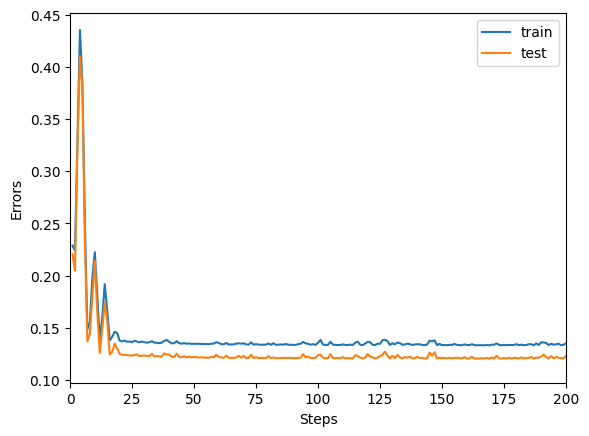

In [ ]:
import matplotlib.pyplot as plt
plt.plot(steps, errors_adam, label='train')
plt.plot(steps, error_test_adam, label='test')
plt.xlabel("Steps")
plt.ylabel("Errors")
plt.xlim(0,200)
plt.legend()
plt.show()

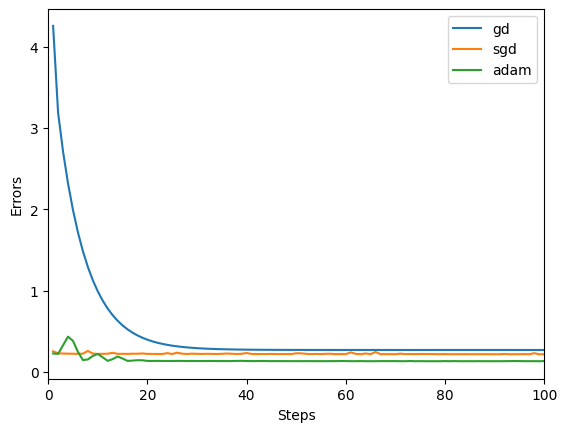

In [ ]:
import matplotlib.pyplot as plt
plt.xlim(0, 100)
plt.plot(steps, errors_gd, label='gd')
plt.plot(steps, errors_sgd, label='sgd')
plt.plot(steps, errors_adam, label='adam')
plt.xlabel("Steps")
plt.ylabel("Errors")
plt.legend()
plt.show()